In [1265]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1266]:
# cargar el dataset como un dataframe

data = pd.read_csv("titanic.csv")
data = data.dropna(subset=['Age'])
data = data.dropna(subset=['Fare']) #SibSp
data = data.dropna(subset=['SibSp']) #SibSp
columnas_a_eliminar = ['PassengerId', 'Name', 'Sex', 'Parch', 'Ticket', 'Cabin', 'Embarked']

# Eliminar las columnas especificadas
data = data.drop(columns=columnas_a_eliminar)
data.describe()

,Survived,Pclass,Age,SibSp,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,34.694514
std,0.491460,0.838250,14.526497,0.929783,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,512.329200


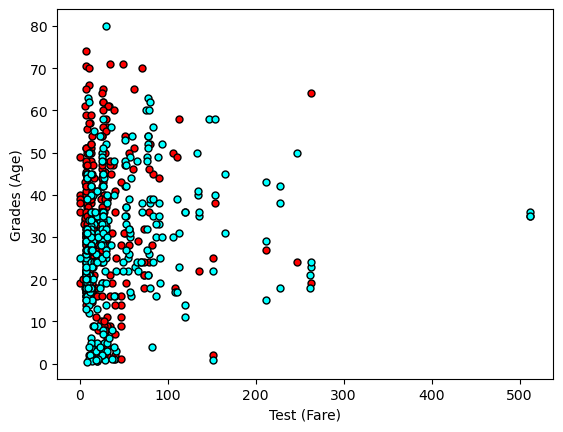

In [1267]:
# Plotear los datos

def plot_points(data):
    X = np.array(data[["Fare","Age"]]) #Pclass = Rank
    y = np.array(data["Survived"]) #y
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (Fare)')
    plt.ylabel('Grades (Age)')

plot_points(data)
plt.show()

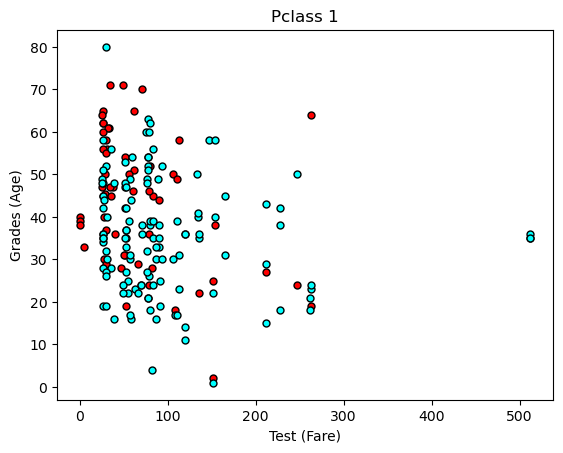

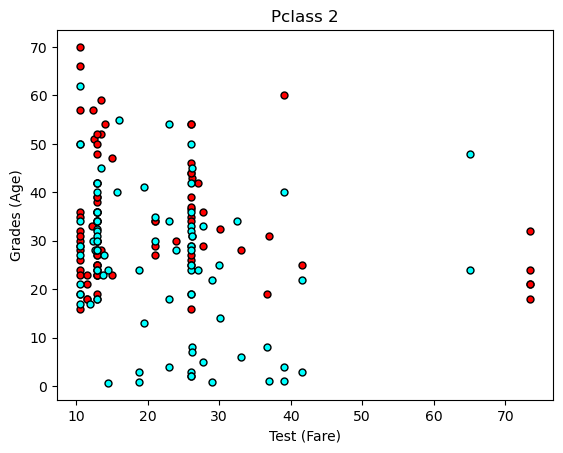

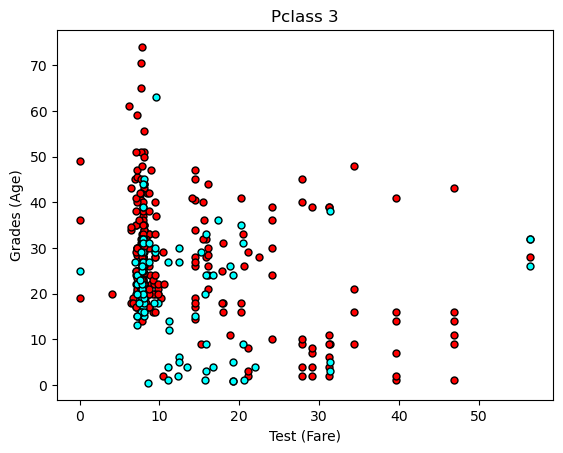

In [1268]:
# Separar ranking

data_rank1 = data[data["Pclass"]==1]
data_rank2 = data[data["Pclass"]==2]
data_rank3 = data[data["Pclass"]==3]

# Plotear los 4 grupos
plot_points(data_rank1)
plt.title("Pclass 1")
plt.show()
plot_points(data_rank2)
plt.title("Pclass 2")
plt.show()
plot_points(data_rank3)
plt.title("Pclass 3")
plt.show()


In [1269]:
# One hot encoding

one_hot_data = pd.concat([data, pd.get_dummies(data['Pclass'], prefix='Clase', dtype=int)], axis=1)
one_hot_data


,Survived,Pclass,Age,SibSp,Fare,Clase_1,Clase_2,Clase_3
0,0,3,22.0,1,7.2500,0,0,1
1,1,1,38.0,1,71.2833,1,0,0
2,1,3,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,1,0,0
4,0,3,35.0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,29.1250,0,0,1
886,0,2,27.0,0,13.0000,0,1,0
887,1,1,19.0,0,30.0000,1,0,0
889,1,1,26.0,0,30.0000,1,0,0


In [1270]:
# Borrar columna 4, "rank"
one_hot_data = one_hot_data.drop('Pclass', axis=1)
one_hot_data

,Survived,Age,SibSp,Fare,Clase_1,Clase_2,Clase_3
0,0,22.0,1,7.2500,0,0,1
1,1,38.0,1,71.2833,1,0,0
2,1,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,1,0,0
4,0,35.0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...
885,0,39.0,0,29.1250,0,0,1
886,0,27.0,0,13.0000,0,1,0
887,1,19.0,0,30.0000,1,0,0
889,1,26.0,0,30.0000,1,0,0


In [1271]:
# Normalizacion

# Copia al dataset
processed_data = one_hot_data[:]
processed_data

,Survived,Age,SibSp,Fare,Clase_1,Clase_2,Clase_3
0,0,22.0,1,7.2500,0,0,1
1,1,38.0,1,71.2833,1,0,0
2,1,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,1,0,0
4,0,35.0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...
885,0,39.0,0,29.1250,0,0,1
886,0,27.0,0,13.0000,0,1,0
887,1,19.0,0,30.0000,1,0,0
889,1,26.0,0,30.0000,1,0,0


In [1272]:
# Escalamiento
processed_data['Fare'] = processed_data['Fare']/processed_data['Fare'].max() #
processed_data['SibSp'] = processed_data['SibSp']/processed_data['SibSp'].max() #
processed_data['Age'] = processed_data['Age']/processed_data['Age'].max() #
processed_data

,Survived,Age,SibSp,Fare,Clase_1,Clase_2,Clase_3
0,0,0.2750,0.2,0.014151,0,0,1
1,1,0.4750,0.2,0.139136,1,0,0
2,1,0.3250,0.0,0.015469,0,0,1
3,1,0.4375,0.2,0.103644,1,0,0
4,0,0.4375,0.0,0.015713,0,0,1
...,...,...,...,...,...,...,...
885,0,0.4875,0.0,0.056848,0,0,1
886,0,0.3375,0.0,0.025374,0,1,0
887,1,0.2375,0.0,0.058556,1,0,0
889,1,0.3250,0.0,0.058556,1,0,0


In [1273]:
# Dividir los datos en train (90%) y test (10%)
# Generar índices para el conjunto de entrenamiento
train_size = int(len(processed_data) * 0.9)
train_indices = np.random.choice(processed_data.index, size=train_size, replace=False)

# Obtener los índices para el conjunto de prueba
test_indices = processed_data.index.difference(train_indices)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = processed_data.loc[train_indices]
test_data = processed_data.loc[test_indices]

print(len(train_data))
print(len(test_data))

print(train_data.head())
print(test_data.head())

# Generar índices para el conjunto de entrenamiento


642
72
     Survived     Age  SibSp      Fare  Clase_1  Clase_2  Clase_3
642         0  0.0250    0.6  0.054457        0        0        1
608         1  0.2750    0.2  0.081157        0        1        0
174         0  0.7000    0.0  0.059914        1        0        0
555         0  0.7750    0.0  0.051822        1        0        0
673         1  0.3875    0.0  0.025374        0        1        0
    Survived     Age  SibSp      Fare  Clase_1  Clase_2  Clase_3
14         0  0.1750    0.0  0.015330        0        0        1
18         0  0.3875    0.2  0.035134        0        0        1
25         1  0.4750    0.2  0.061264        0        0        1
27         0  0.2375    0.6  0.513342        1        0        0
40         0  0.5000    0.2  0.018494        0        0        1


In [1274]:
# Dividir la data entre x e y
# y --> label, target, clase
# x --> caracteristica, datos, features
# wx + b

# Datos de entrenamiento
features = train_data.drop('Survived', axis=1)   # El x
targets = train_data['Survived']  # EL y

# Datos de test
features_test = test_data.drop('Survived', axis=1)
targets_test = test_data['Survived']

print(features[:5])
print(targets[:5])

        Age  SibSp      Fare  Clase_1  Clase_2  Clase_3
642  0.0250    0.6  0.054457        0        0        1
608  0.2750    0.2  0.081157        0        1        0
174  0.7000    0.0  0.059914        1        0        0
555  0.7750    0.0  0.051822        1        0        0
673  0.3875    0.0  0.025374        0        1        0
642    0
608    1
174    0
555    0
673    1
Name: Survived, dtype: int64


In [1275]:
# Red neuronal

# Funciones
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)


In [1276]:
# Backpropagation

def error_term_formula(x, y, output):
    #pass
    return (y - output)*sigmoid_prime(x)

In [1277]:
# Defino la red neuronal

epochs = 130 #1000
learnrate = 0.6 #0.9

# Entrenamiento de la red

def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    #np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))   # sigmoid(wx + b)

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records
        #print(weights)

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    



In [1278]:
# entreno el modelo
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2643563670569059
Epoch: 13
Train loss:  0.2484003645256927
Epoch: 26
Train loss:  0.23779229061805948
Epoch: 39
Train loss:  0.2307359156268059
Epoch: 52
Train loss:  0.22597024724632997
Epoch: 65
Train loss:  0.22267738562371783
Epoch: 78
Train loss:  0.22034166099907587
Epoch: 91
Train loss:  0.2186389621748136
Epoch: 104
Train loss:  0.21736356435878645
Epoch: 117
Train loss:  0.21638273711071326
Finished training!


In [1279]:
# Imprimo el ultimo peso obtenido
weights

array([-0.02234787,  0.12182804,  0.32862818,  0.26158232, -0.0403764 ,
       -0.89907566])

In [1280]:
# Utilizamos los datos de test

test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.806


## Trabajo

Adecuar el documento, y procesar el dataset de titanic